<center>
  <img src="https://www.inteli.edu.br/wp-content/uploads/2022/04/28103439/Logo-Container.png" />
</center>

# `[SI10-2024-P1]` - Prova Prática

Sistemas de Informação - Módulo 10 - Turma 4



**Nome**: *Gabriel Rocha Pinto Santos*

**ANTES DE PROSSEGUIR FAÇA UMA CÓPIA DESTE NOTEBOOK**

----

## Contexto

Uma plataforma online, que atua na venda de produtos, deseja otimizar sua interface para melhorar a experiência do usuário e aumentar as taxas de conversão. Recentemente, a empresa implementou um redesign de sua página web, e os registros dessa mudança estão detalhados nos dados coletados desde então. As variáveis registradas diariamente incluem o número de visitantes únicos, sessões, taxa de rejeição, páginas por sessão, principais origens do tráfego, tipos de dispositivos usados, eventos ocorridos, taxa de conversão e o tempo médio de sessão.

Com base nesses dados, a empresa considera realizar uma mudança similar para otimizar ainda mais sua plataforma. Antes de proceder, a equipe deseja empregar simulações de Monte Carlo para avaliar os possíveis impactos de um novo redesign na taxa de conversão, tempo médio de sessão e taxa de rejeição, utilizando análises estatísticas para prever tendências futuras e ajustar estratégias de maneira informada. Essa abordagem visa garantir que as decisões tomadas maximizem as taxas de conversões, fundamentais para o sucesso contínuo da plataforma.

## Importação do dataset e das bibliotecas

In [1]:
# Importação do dataset
# https://drive.google.com/file/d/1K_2ZDsrhheRDKoHN2ynfLCPGPFiS2CZr/view?usp=drive_link
!gdown 1K_2ZDsrhheRDKoHN2ynfLCPGPFiS2CZr

Downloading...
From: https://drive.google.com/uc?id=1K_2ZDsrhheRDKoHN2ynfLCPGPFiS2CZr
To: /content/ITL-SI10-2024-P1-dataset.csv
100% 7.03k/7.03k [00:00<00:00, 12.0MB/s]


In [25]:
# Importação das bibliotecas
import pandas as pd
from pandas import Series, DataFrame
import matplotlib.pyplot as plt
import matplotlib as mpl
import numpy as np
import scipy.stats as stats
import random
import plotly.express as px


# Transforma o dataset em DataFrame Pandas
df = pd.read_csv('ITL-SI10-2024-P1-dataset.csv')
print(df.head())

         Data  Visitantes Únicos  Sessões  Taxa de Rejeição (%)  \
0  2023-01-01              113.0    126.0             50.496714   
1  2023-01-02               90.0    157.0             49.438007   
2  2023-01-03               92.0    185.0             49.800231   
3  2023-01-04              130.0    206.0             50.251843   
4  2023-01-05              123.0    155.0             48.070931   

   Páginas por Sessão Principais Origens do Tráfego Dispositivos  Eventos  \
0            1.834201                        Direto      Desktop        8   
1            1.955760                        Social      Desktop        5   
2            2.285052                        Direto      Desktop        9   
3            2.325464                          Pago       Mobile        6   
4            2.267006                        Direto      Desktop        6   

   Taxa de Conversão (%)  Tempo Médio de Sessão (minutos)  
0               1.952083                         5.395516  
1             

## Questões

### Questão 1

**Análise Exploratória de Dados**: Faça a exploração dos dados, utilizando gráficos interativos. Identifique correlações entre as variáveis e apresente essas relações em uma matriz de correlação focada nas variáveis mais relevantes para a conversão de vendas.

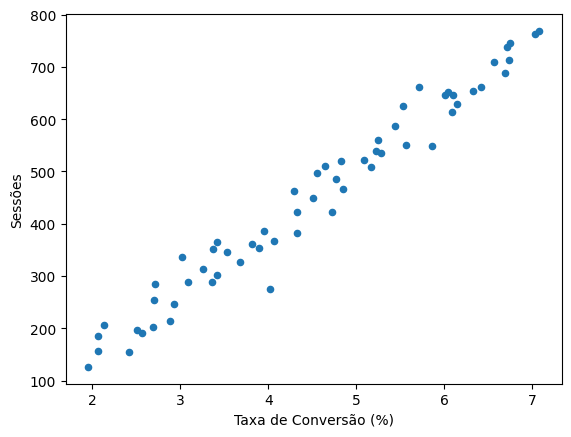

In [20]:
df.plot(x='Taxa de Conversão (%)', y='Sessões', kind='scatter')
plt.show()

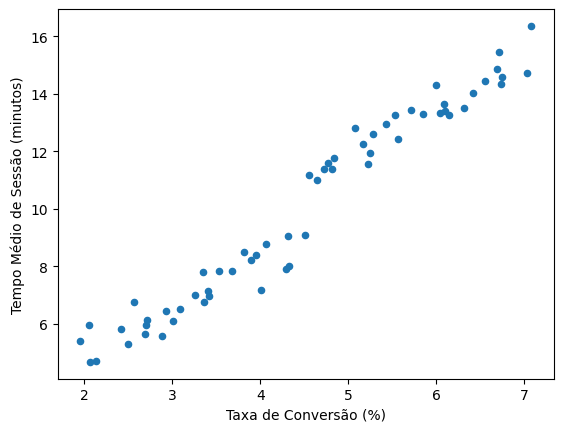

In [21]:
df.plot(x='Taxa de Conversão (%)', y='Tempo Médio de Sessão (minutos)', kind='scatter')
plt.show()

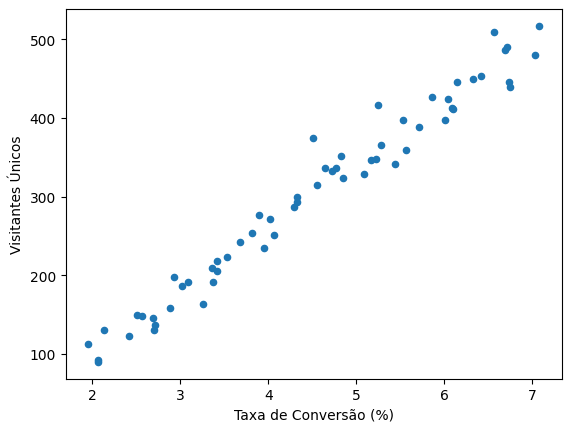

In [23]:
df.plot(x='Taxa de Conversão (%)', y='Visitantes Únicos', kind='scatter')
plt.show()

A quantidade diária de visitantes únicos, sessão e tempo médio de sessão apresentam correlação positiva quanto a taxa de conversão, ou seja quanto maior qualquer uma das 3 quantidades maior será a taxa de conversão.

### Questão 2

**Simulação de Monte Carlo**: Implemente uma simulação de Monte Carlo para avaliar os possíveis efeitos de um novo redesign na plataforma. Analise como diferentes variáveis podem impactar os resultados e discuta os cenários que esta simulação pode prever, ajudando a empresa a tomar decisões mais informadas sobre o redesign.

In [24]:
sim_campaigns_period = 60

Y = df.head(sim_campaigns_period)
X = df.tail(df.shape[0] - sim_campaigns_period)

X.columns

Index(['Data', 'Visitantes Únicos', 'Sessões', 'Taxa de Rejeição (%)',
       'Páginas por Sessão', 'Principais Origens do Tráfego', 'Dispositivos',
       'Eventos', 'Taxa de Conversão (%)', 'Tempo Médio de Sessão (minutos)'],
      dtype='object')

In [41]:
dias_para_prever_Sessões = 60
num_simulacoes_Sessões = 10000
media = df['Sessões'].mean()
desvio_padrao = df['Sessões'].std()

In [42]:
simulacoes = [np.random.normal(loc=media, scale=desvio_padrao, size=dias_para_prever_Sessões) for _ in range(num_simulacoes_Sessões)]
resultados_simulacao = pd.DataFrame(simulacoes).transpose()
resultados_media = resultados_simulacao.mean(axis=1)
resultados_std = resultados_simulacao.std(axis=1)

In [43]:
dias = list(range(1, dias_para_prever_Sessões + 1))
previsoes = pd.DataFrame({
    'Dia': dias,
    'Média das Previsões': resultados_media,
    'Desvio Padrão': resultados_std,
    'Limite Inferior': resultados_media - resultados_std,
    'Limite Superior': resultados_media + resultados_std
})

In [44]:
fig = px.line(previsoes, x='Dia', y='Média das Previsões', title='Previsão de Sessões para os Próximos 60 Dias')
fig.add_scatter(x=previsoes['Dia'], y=previsoes['Limite Inferior'], fill='tonexty', mode='lines', line=dict(color='lightblue'), showlegend=False)
fig.add_scatter(x=previsoes['Dia'], y=previsoes['Limite Superior'], fill='tonexty', mode='lines', line=dict(color='lightblue'), showlegend=False, name='Intervalo de 1 Desvio Padrão')
fig.update_layout(xaxis_title='Dias', yaxis_title='Sessões', legend_title='Legenda')
fig.show()

Simulação da variação diária de sessões ao longo de 60 dias.

### Questão 3

**Análise de Sensibilidade**: Realize uma análise de sensibilidade para examinar como alterações em diferentes variáveis de entrada afetam as previsões da taxa de conversão.

In [53]:
sensibilidade = (media / (media + simulacoes))
sensibilidade

array([[0.87513311, 0.56710674, 0.75009452, ..., 0.46748226, 0.49235376,
        0.43752625],
       [0.36641127, 0.49944409, 0.41035111, ..., 0.57145846, 0.56609413,
        0.59425041],
       [1.08712149, 0.64351398, 0.64133842, ..., 0.49015273, 0.75779864,
        0.58748677],
       ...,
       [1.61103635, 0.46287591, 0.81146211, ..., 0.56026501, 0.37709716,
        0.56893351],
       [0.46149911, 0.58333707, 0.51237674, ..., 0.51184485, 0.62740818,
        0.69204349],
       [0.44833743, 0.45426635, 0.46396581, ..., 0.40784607, 0.34104315,
        0.52668215]])

## Entrega

Siga esses passos para entregar sua prova.

1. Crie um repositório no GitHub para essa entrega.

2. Submeta seu desenvolvimento neste repositório.

3. Garanta que o repositório é publicamente acessível (eliminatório).

4. No Google forms da prova, submeta a URL do repositório.